<a href="https://colab.research.google.com/github/hemanthgupta29/INFO_5731_project/blob/main/category_list.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df=pd.read_csv('category.csv')
input_df= df.head(5000)
print(input_df.head())
df

  Category (incl. context and answer)                                        Description
0                       Document Name                           The name of the contract
1                             Parties    The two or more parties who signed the contract
2                      Agreement Date                           The date of the contract
3                      Effective Date            The date when the contract is effective
4                     Expiration Date  On what date will the contract's initial term ...


,Category (incl. context and answer),Description
0,Document Name,The name of the contract
1,Parties,The two or more parties who signed the contract
2,Agreement Date,The date of the contract
3,Effective Date,The date when the contract is effective
4,Expiration Date,On what date will the contract's initial term ...
5,Renewal Term,What is the renewal term after the initial ter...
6,Notice to Terminate Renewal,What is the notice period required to terminat...
7,Governing Law,Which state/country's law governs the interpre...
8,Most Favored Nation,Is there a clause that if a third party gets b...
9,Non-Compete,Is there a restriction on the ability of a par...


In [3]:

# Find the shape of the dataset
input_df.shape

(40, 2)

In [4]:
# Find the basic info of the dataset, to check if there are any null values
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Category (incl. context and answer)  40 non-null     object
 1   Description                          40 non-null     object
dtypes: object(2)
memory usage: 768.0+ bytes


In [5]:
#null values are present in the dataset as the shape and nonnull values from the info() dot match
print(input_df.isnull().sum())
# Dropping the null values
input_df=input_df.dropna()

Category (incl. context and answer)    0
Description                            0
dtype: int64


In [6]:
#steps involving all the basic steps of preprocessing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize  
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words=stopwords.words("english")
# cleaning the text data
input_df['cleaned_data'] = input_df['Description'].str.replace(r"\W", " ").str.strip()# 1.To remove special characters and punctuations
input_df['cleaned_data'] = input_df['cleaned_data'].str.replace(r'\d+',"") #2.To remove Numbers
input_df['cleaned_data'] = input_df['cleaned_data'].apply(lambda x: " ".join(x.lower() for x in x.split())) #convert the whole text into lower case
input_df['cleaned_data'] = input_df['cleaned_data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words)) #remove all stop words
#input_df['cleaned text review'] # dataframe column that would be used for further process
input_df

#data cleaning for Labels
input_df['labels'] = input_df['Category (incl. context and answer)'].str.replace(r"\W", " ").str.strip()# 1.To remove special characters and punctuations
input_df['labels'] = input_df['labels'].apply(lambda x: " ".join(x.lower() for x in x.split())) #convert the whole text into lower case
input_df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,Category (incl. context and answer),Description,cleaned_data,labels
0,Document Name,The name of the contract,name contract,document name
1,Parties,The two or more parties who signed the contract,two parties signed contract,parties
2,Agreement Date,The date of the contract,date contract,agreement date
3,Effective Date,The date when the contract is effective,date contract effective,effective date
4,Expiration Date,On what date will the contract's initial term ...,date contract initial term expire,expiration date
5,Renewal Term,What is the renewal term after the initial ter...,renewal term initial term expires includes aut...,renewal term
6,Notice to Terminate Renewal,What is the notice period required to terminat...,notice period required terminate renewal,notice to terminate renewal
7,Governing Law,Which state/country's law governs the interpre...,state country law governs interpretation contract,governing law
8,Most Favored Nation,Is there a clause that if a third party gets b...,clause third party gets better terms licensing...,most favored nation
9,Non-Compete,Is there a restriction on the ability of a par...,restriction ability party compete counterparty...,non compete


In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(input_df['cleaned_data']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

In [8]:
import sys
sys.path.insert(1,'category.csv')

LDA Modelling

In [24]:
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
def LDA_MODEL(number_of_topics,tf,feature_names, no_top_words):
  number_of_topics = 2
  model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)
  model.fit(tf)
  return display_topics(model,feature_names, no_top_words)
  pass

def display_topics(model, feature_names, no_top_words):
  topic_dict = {}
  for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i]) for i in topic.argsort()[:-no_top_words - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i]) for i in topic.argsort()[:-no_top_words - 1:-1]]
  return pd.DataFrame.from_dict(topic_dict)


In [19]:
#import AlgorithmLDA as lda_ul
result = LDA_MODEL(10,tf,tf_feature_names,10)
result

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,contract,0.1,contract,17.1,contract,0.1,contract,0.1,contract,0.1,contract,0.1,party,18.6,contract,10.1,party,7.1,contract,0.1
1,party,0.1,party,0.1,party,0.1,party,0.1,party,0.1,party,0.1,contract,0.1,party,5.6,contract,5.1,party,0.1


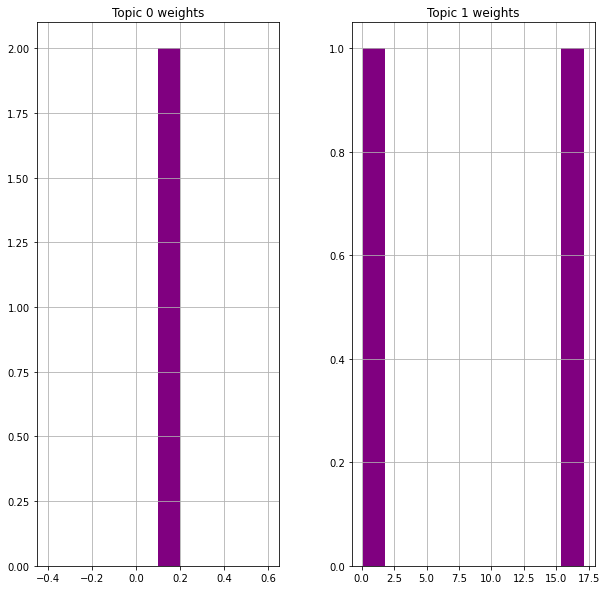

In [21]:

import matplotlib.pyplot as plt
columns_list = ["Topic "+str(i)+" weights" for i in range(0,2)]
for i in columns_list:
  result[i] = pd.to_numeric(result[i])
result.hist(figsize=(10,10),color = 'Purple')
plt.show(block=False)


LinAlgError: ignored

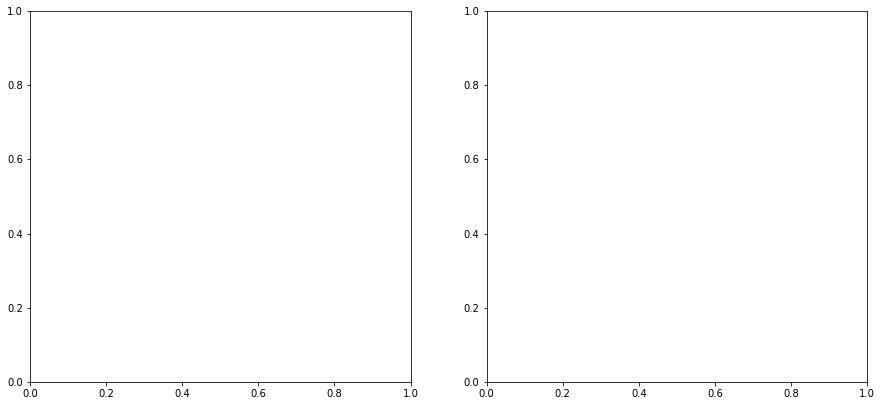

In [25]:
result.plot(kind='density', subplots=True,layout = (2,2),sharex=False, legend=True, fontsize=1,figsize=(15,15))
plt.show(block=False)

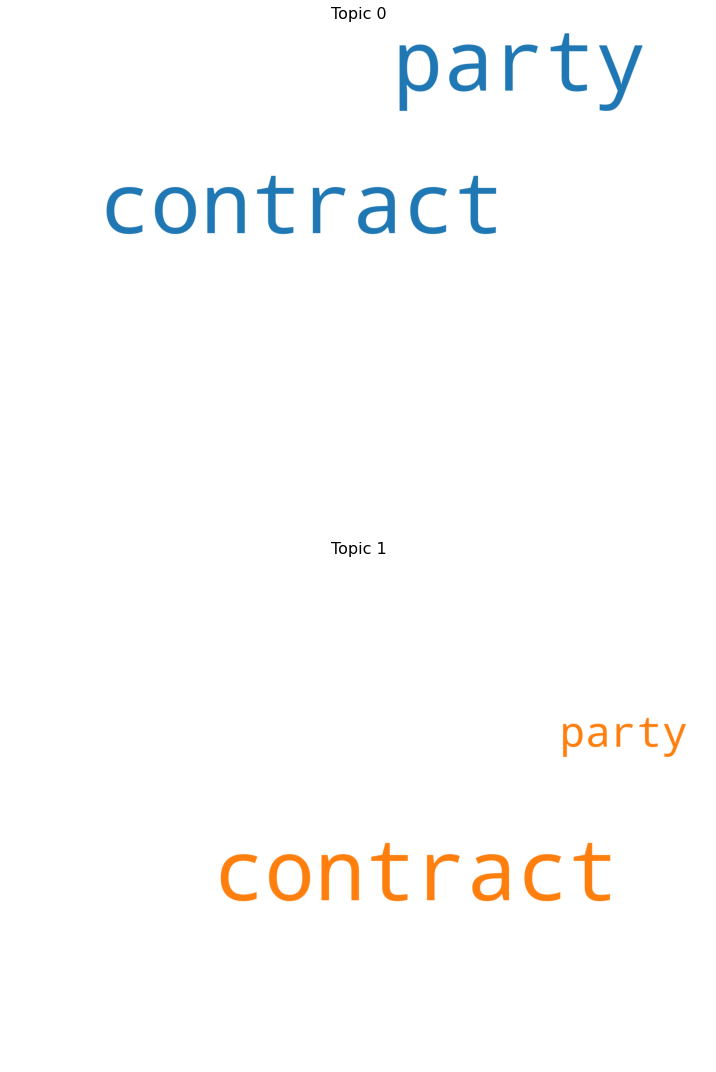

In [30]:
# Wordcloud of Top N words in each topic
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
my_stopwords = nltk.corpus.stopwords.words('english')

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=my_stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

columns_list = ["Topic "+str(i)+" words" for i in range(0,2)]
topics = list()

for i in columns_list:
  topics.append(result[i].values)

frequencies = list()
columns_list = ["Topic "+str(i)+" weights" for i in range(0,2)]

for i in columns_list:
  frequencies.append(result[i].values)


fig, axes = plt.subplots(2,1, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    size_of_array = len(topics[i])
    topic_words = dict()
    for j in range(size_of_array):
      topic_words[topics[i][j]] = frequencies[i][j]
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

LSA TOPIC MODELLING



In [36]:
from sklearn.decomposition import TruncatedSVD
import pandas as pd

def LSA_MODEL(tf,vectorizer):
  svd_model = TruncatedSVD(n_components=1, algorithm ='randomized', n_iter=100, random_state=122)
  svd_model.fit(tf)
  terms = vectorizer.get_feature_names()
  df = pd.DataFrame()
  for i, comp in enumerate(svd_model.components_):
    term_comp = zip(terms,comp)
    sorted_terms = sorted(term_comp, key = lambda x:x[1], reverse = True)[:7]
    str1 = "Topic "+str(i)
    str2 = str1 + " weights"
    str1_list = list()
    str2_list = list()
    for j in sorted_terms:
      str1_list.append(j[0])
      str2_list.append(j[1])
    df[str1] = str1_list
    df[str2] = str2_list
  return df

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
#import AlgorithmLSA as lsa
lsa_result=LSA_MODEL(tf,vectorizer)
lsa_result

,Topic 0,Topic 0 weights
0,contract,0.714433
1,party,0.699704


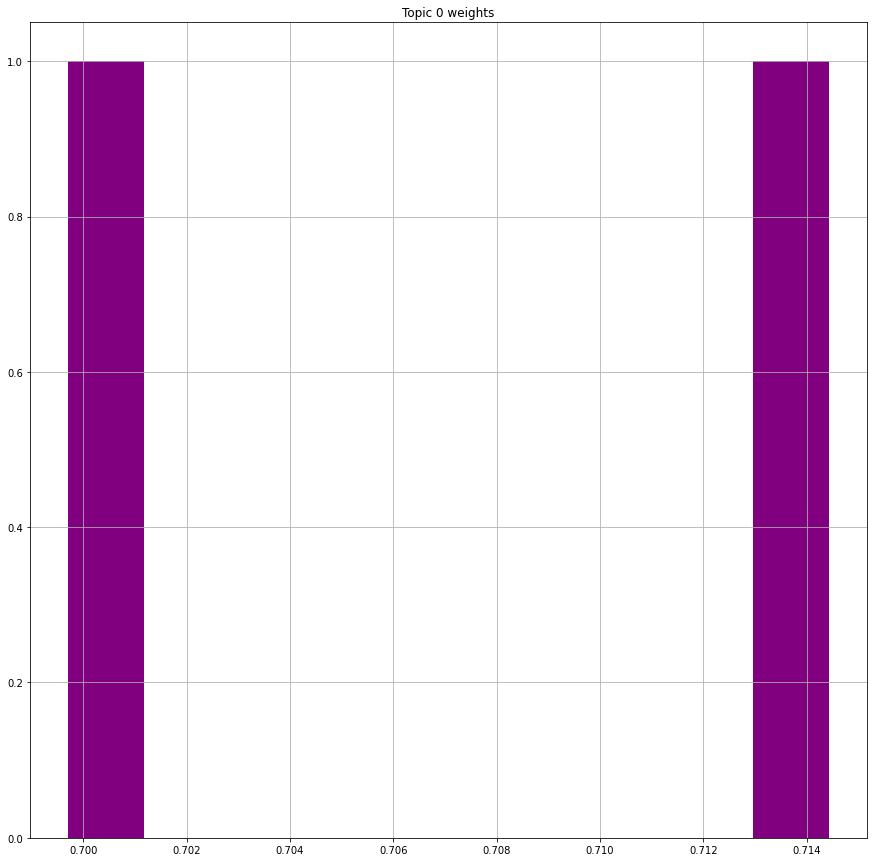

In [42]:
columns_list = ["Topic "+str(i)+" weights" for i in range(0,1)]
for i in columns_list:
  lsa_result[i] = pd.to_numeric(lsa_result[i])
lsa_result.hist(figsize=(15,15),color = 'purple')
plt.show(block=False)


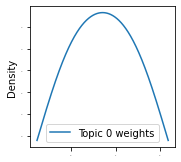

In [43]:
lsa_result.plot(kind='density', subplots=True,layout = (5,5),sharex=False, legend=True, fontsize=1,figsize=(15,15))
plt.show(block=False)

IndexError: ignored

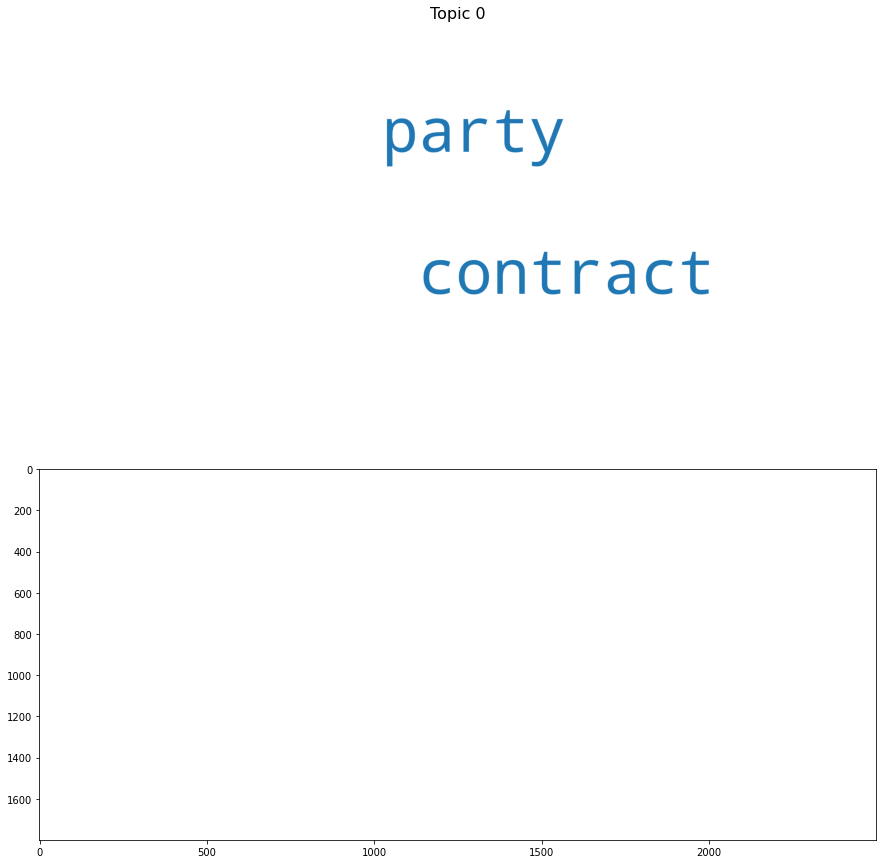

In [58]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
cols = cols*2
cloud = WordCloud(stopwords=my_stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

columns_list = ["Topic "+str(i) for i in range(0,1)]
topics = list()

for i in columns_list:
  topics.append(lsa_result[i].values)

frequencies = list()
columns_list = ["Topic "+str(i)+" weights" for i in range(0,1)]

for i in columns_list:
  frequencies.append(lsa_result[i].values)


fig, axes = plt.subplots(2,1, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    size_of_array = len(topics[i])
    topic_words = dict()
    for j in range(size_of_array):
      topic_words[topics[i][j]] = frequencies[i][j]
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


HMM-LDA TOPIC MODELLING

In [60]:
#import AlgorithmHMMLDA as HMMLDA
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [61]:
from __future__ import print_function
import time

from six.moves import xrange
import numpy as np
from scipy.special import gammaln

class BaseTopicModel(object):
    def __init__(self, n_doc, n_voca, **kwargs):
        self.n_doc = n_doc
        self.n_voca = n_voca
        self.verbose = kwargs.pop('verbose', True)

class BaseGibbsParamTopicModel(BaseTopicModel):


    def __init__(self, n_doc, n_voca, n_topic, alpha, beta, **kwargs):
        super(BaseGibbsParamTopicModel, self).__init__(n_doc=n_doc, n_voca=n_voca, **kwargs)
        self.n_topic = n_topic
        self.TW = np.zeros([self.n_topic, self.n_voca])
        self.DT = np.zeros([self.n_doc, self.n_topic])
        self.sum_T = np.zeros(self.n_topic)

        self.alpha = alpha
        self.beta = beta

        self.topic_assignment = list()

        self.TW += self.beta
        self.sum_T += self.beta * self.n_voca
        self.DT += self.alpha

class HMM_LDA(BaseGibbsParamTopicModel):

    def __init__(self, n_docs, n_voca, n_topic, n_class, alpha=0.1, beta=0.01, gamma=0.1, eta=0.1, **kwargs):
        super(HMM_LDA, self).__init__(n_docs, n_voca, n_topic, alpha, beta, **kwargs)
        self.n_class = n_class

        self.gamma = gamma
        self.eta = eta

        self.CW = np.zeros([self.n_class, self.n_voca]) + self.gamma  # class x word
        self.sum_C = np.zeros([self.n_class]) + self.n_voca * self.gamma

        self.T = np.zeros([self.n_class + 2, self.n_class + 2]) + self.eta

        self.word_class = list()
        self.word_topic = list()

    def fit(self, docs, max_iter=100):
        self.random_init(docs)
        self.gibbs_sampling(docs, max_iter)

    # randomly initialize 
    def random_init(self, docs):

        for di in xrange(self.n_doc):
            doc = docs[di]
            num_sentence = len(doc)

            doc_class = list()
            doc_topic = list()

            for si in xrange(num_sentence):
                sentence_class = list()
                sentence_topic = list()

                sentence = doc[si]
                len_sentence = len(sentence)

                for wi in xrange(len_sentence):
                    word = sentence[wi]
                    c = np.random.randint(self.n_class)

                    sentence_class.append(c)
                    self.CW[c, word] += 1
                    self.sum_C[c] += 1
                    if wi == 0:  # if the first word
                        self.T[self.n_class, c] += 1
                    else:
                        self.T[sentence_class[wi - 1], c] += 1

                    if wi == len_sentence - 1:  # the last word
                        self.T[c, self.n_class + 1] += 1

                    k = np.random.randint(self.n_topic)
                    sentence_topic.append(k)
                    self.DT[di, k] += 1
                    if c == 0:
                        self.TW[k, word] += 1
                        self.sum_T[k] += 1

                doc_class.append(sentence_class)
                doc_topic.append(sentence_topic)

            self.word_class.append(doc_class)
            self.word_topic.append(doc_topic)

    def gibbs_sampling(self, docs, max_iter):

        for iter in xrange(max_iter):
            tic = time.time()
            for di, doc in enumerate(docs):
                doc_topic = self.word_topic[di]
                doc_class = self.word_class[di]

                for si, sentence in enumerate(doc):
                    len_sentence = len(sentence)

                    sentence_topic = doc_topic[si]
                    sentence_class = doc_class[si]

                    for wi, word in enumerate(sentence):

                        if wi == 0:
                            prev_c = self.n_class
                        else:
                            prev_c = sentence_class[wi - 1]

                        if wi == len_sentence - 1:
                            next_c = self.n_class + 1
                        else:
                            next_c = sentence_class[wi + 1]

                        old_c = sentence_class[wi]
                        old_t = sentence_topic[wi]

                        # remove previous state
                        self.CW[old_c, word] -= 1
                        self.sum_C[old_c] -= 1
                        self.T[prev_c, old_c] -= 1
                        self.T[old_c, next_c] -= 1

                        # sample class
                        prob = (self.T[prev_c, :self.n_class] / self.T[prev_c].sum()) \
                                * (self.T[:self.n_class, next_c] / np.sum(self.T[:self.n_class], 1))
                        prob[0] *= (self.TW[old_t, word] / self.sum_T[old_t])
                        prob[1:] *= self.CW[1:, word] / self.sum_C[1:]

                        new_c = np.random.multinomial(1, prob).argmax()

                        sentence_class[wi] = new_c
                        self.CW[new_c, word] += 1
                        self.sum_C[new_c] += 1
                        self.T[prev_c, new_c] += 1
                        self.T[new_c, next_c] += 1

                        # remove previous topic state
                        self.DT[di, old_t] -= 1
                        if old_c == 0:
                            self.TW[old_t, word] -= 1
                            self.sum_T[old_t] -= 1

                        # sample topic
                        prob = self.DT[di].copy()
                        if new_c == 0:
                            prob *= self.TW[:, word] / self.sum_T
                        prob /= np.sum(prob)

                        new_topic = np.random.multinomial(1, prob).argmax()
                        self.DT[di, new_topic] += 1
                        if new_c == 0:
                            self.TW[new_topic, word] += 1
                            self.sum_T[new_topic] += 1
                        sentence_topic[wi] = new_topic

            if self.verbose:
                ll = self.log_likelihood()
                logger.info('[ITER] %d,\telapsed time: %.2f\tlog-likelihood:%.2f', iter, time.time() - tic, ll)

    def log_likelihood(self):

        ll = self.n_doc * gammaln(self.alpha * self.n_topic)
        ll -= self.n_doc * self.n_topic * gammaln(self.alpha)
        ll += self.n_topic * gammaln(self.beta * self.n_voca)
        ll -= self.n_topic * self.n_voca * gammaln(self.beta)

        for di in xrange(self.n_doc):
            ll += gammaln(self.DT[di]).sum() - gammaln(self.DT[di].sum())
        for ki in xrange(self.n_topic):
            ll += gammaln(self.TW[ki]).sum() - gammaln(self.sum_T[ki])

        if self.n_class != 1:
            ll += (self.n_class - 1) * gammaln(self.gamma * (self.n_class - 1))
            ll -= (self.n_class - 1) * self.n_voca * gammaln(self.gamma)
            ll += (self.n_class + 2) * gammaln(self.eta * (self.n_class + 2))
            ll -= (self.n_class + 2) * (self.n_class + 2) * gammaln(self.eta)

            for ci in xrange(1, self.n_class):
                ll += gammaln(self.CW[ci]).sum() - gammaln(self.sum_C[ci])
            for ci in xrange(self.n_class + 2):
                ll += gammaln(self.T[ci]).sum() - gammaln(self.T[ci].sum())

        return ll

In [62]:
def get_reuters_token_list_by_sentence(num_doc,ip):
    corpus = [[i.split() for i in ip ]]
    print(corpus)
    valid_voca = set(w.lower() for w in nltk.corpus.words.words())
    stop = stopwords.words('english')
    valid_voca = valid_voca.union(stop)

    tmp_corpus = list()
    voca_dic = dict()
    voca = list()
    for doc in corpus:
        tmp_doc = list()
        for sent in doc:
            tmp_sent = list()
            for word in sent:
                if word in valid_voca:
                    tmp_sent.append(word)
                    if word not in voca_dic:
                        voca_dic[word] = len(voca_dic)
                        voca.append(word)
            if len(tmp_sent) > 0:
                tmp_doc.append(tmp_sent)
        if len(tmp_doc) > 0:
            tmp_corpus.append(tmp_doc)

    # convert token list to word index list
    corpus = list()
    for doc in tmp_corpus:
        new_doc = list()
        for sent in doc:
            new_sent = list()
            for word in sent:
                new_sent.append(voca_dic[word])
            new_doc.append(new_sent)
        corpus.append(new_doc)

    return np.array(voca), corpus

In [63]:
n_docs = 1000
voca, corpus = get_reuters_token_list_by_sentence(n_docs,input_df["cleaned_data"].values)

[[['name', 'contract'], ['two', 'parties', 'signed', 'contract'], ['date', 'contract'], ['date', 'contract', 'effective'], ['date', 'contract', 'initial', 'term', 'expire'], ['renewal', 'term', 'initial', 'term', 'expires', 'includes', 'automatic', 'extensions', 'unilateral', 'extensions', 'prior', 'notice'], ['notice', 'period', 'required', 'terminate', 'renewal'], ['state', 'country', 'law', 'governs', 'interpretation', 'contract'], ['clause', 'third', 'party', 'gets', 'better', 'terms', 'licensing', 'sale', 'technology', 'goods', 'services', 'described', 'contract', 'buyer', 'technology', 'goods', 'services', 'contract', 'shall', 'entitled', 'better', 'terms'], ['restriction', 'ability', 'party', 'compete', 'counterparty', 'operate', 'certain', 'geography', 'business', 'technology', 'sector'], ['exclusive', 'dealing', 'commitment', 'counterparty', 'includes', 'commitment', 'procure', 'requirements', 'one', 'party', 'certain', 'technology', 'goods', 'services', 'prohibition', 'licens

In [67]:

n_voca = len(voca)
n_topic = 2
n_class = 2
max_iter = 100
model = HMM_LDA(len(corpus), n_voca, n_topic, n_class, alpha=0.1, beta=0.1, gamma=0.1, eta=0.1, verbose=False)
model.fit(corpus, max_iter=max_iter)

In [69]:
def get_top_words(topic_word_matrix, vocab, topic, n_words=2):
    if not isinstance(vocab, np.ndarray):
        vocab = np.array(vocab)
    top_words = vocab[topic_word_matrix[topic].argsort()[::-1][:n_words]]
    return top_words

In [70]:
for ti in range(n_topic):
    top_words = get_top_words(model.TW, voca, ti, n_words=10)
    print('Topic', ti ,': ', ','.join(top_words))

Topic 0 :  dealing,threshold,raise,restriction,ability,similar,buy,compete,reduce,certain
Topic 1 :  profit,shall,non,ownership,contain,licensor,restricted,enterprise,eat,whether


Supervised LDA TOPIC MODELLING

In [71]:
!pip install pymc

     |████████████████████████████████| 389kB 6.7MB/s 
  Created wheel for pymc: filename=pymc-2.3.8-cp37-cp37m-linux_x86_64.whl size=1352841 sha256=29d81b7e20c97327a99a75f99e84ce1b8a63a80edac32048056f263d2ae6f5a9
  Stored in directory: /root/.cache/pip/wheels/0b/a8/e7/8f3ba91a39294d538a92db052fd1fcba1fca74a58c8b022026
Successfully built pymc


In [77]:
from __future__ import print_function

import numpy as np
from scipy.special import gammaln
from scipy.stats import norm
from numpy.linalg import solve
from six.moves import xrange

import numpy as np


import numpy as np

from six.moves import xrange


def sampling_from_dist(prob):
    """ Sample index from a list of unnormalised probability distribution
        same as np.random.multinomial(1, prob/np.sum(prob)).argmax()
    Parameters
    ----------
    prob: ndarray
        array of unnormalised probability distribution
    Returns
    -------
    new_topic: return a sampled index
    """
    thr = prob.sum() * np.random.rand()
    new_topic = 0
    tmp = prob[new_topic]
    while tmp < thr:
        new_topic += 1
        tmp += prob[new_topic]
    return new_topic


def sampling_from_dict(prob):
    """ sample key from dictionary `prob` where values are unnormalised probability distribution
    Parameters
    ----------
    prob: dict
        key = topic
        value = unnormalised probability of the topic
    Returns
    -------
    key: int
        sampled key
    """
    prob_sum = sum(prob.values())

    thr = prob_sum * np.random.rand()
    tmp = 0
    for key, p in prob.items():
        tmp += p
        if tmp < thr:
            new_topic = key
    return new_topic


def isfloat(value):
    """
    Check the value is convertable to float value
    """
    try:
        float(value)
        return True
    except ValueError:
        return False


def read_voca(path):
    """
    open file from path and read each line to return the word list
    """
    with open(path, 'r') as f:
        return [word.strip() for word in f.readlines()]


def word_cnt_to_bow_list(word_ids, word_cnt):
    corpus_list = list()
    for di in xrange(len(word_ids)):
        doc_list = list()
        for wi in xrange(len(word_ids[di])):
            word = word_ids[di][wi]
            for c in xrange(word_cnt[di][wi]):
                doc_list.append(word)
        corpus_list.append(doc_list)
    return corpus_list


def log_normalize(log_prob_vector):
    """
    returns a probability vector of log probability vector
    """
    max_v = log_prob_vector.max()
    log_prob_vector += max_v
    log_prob_vector = np.exp(log_prob_vector)
    log_prob_vector /= log_prob_vector.sum()
    return log_prob_vector


def convert_cnt_to_list(word_ids, word_cnt):
    corpus = list()

    for di in xrange(len(word_ids)):
        doc = list()
        doc_ids = word_ids[di]
        doc_cnt = word_cnt[di]
        for wi in xrange(len(doc_ids)):
            word_id = doc_ids[wi]
            for si in xrange(doc_cnt[wi]):
                doc.append(word_id)
        corpus.append(doc)
    return corpus


def write_top_words(topic_word_matrix, vocab, filepath, n_words=20, delimiter=',', newline='\n'):
    with open(filepath, 'w') as f:
        for ti in xrange(topic_word_matrix.shape[0]):
            top_words = vocab[topic_word_matrix[ti, :].argsort()[::-1][:n_words]]
            f.write('%d' % (ti))
            for word in top_words:
                f.write(delimiter + word)
            f.write(newline)


def get_top_words(topic_word_matrix, vocab, topic, n_words=20):
    if not isinstance(vocab, np.ndarray):
        vocab = np.array(vocab)
    top_words = vocab[topic_word_matrix[topic].argsort()[::-1][:n_words]]
    return top_words


class BaseTopicModel(object):
    """
    Attributes
    ----------
    n_doc: int
        the number of total documents in the corpus
    n_voca: int
        the vocabulary size of the corpus
    verbose: boolean
        if True, print each iteration step while inference.
    """
    def __init__(self, n_doc, n_voca, **kwargs):
        self.n_doc = n_doc
        self.n_voca = n_voca
        self.verbose = kwargs.pop('verbose', True)


class BaseGibbsParamTopicModel(BaseTopicModel):
    """ Base class of parametric topic models with Gibbs sampling inference
    Attributes
    ----------
    n_topic: int
        a number of topics to be inferred through the Gibbs sampling
    TW: ndarray, shape (n_voca, n_topic)
        word-topic matrix, keeps the number of assigned word tokens for each word-topic pair
    DT: ndarray, shape (n_doc, n_topic)
        document-topic matrix, keeps the number of assigned word tokens for each document-topic pair
    sum_T: ndarray, shape (n_topic)
        number of word tokens assigned for each topic
    alpha: float
        symmetric parameter of Dirichlet prior for document-topic distribution
    beta: float
        symmetric parameter of Dirichlet prior for topic-word distribution
    """

    def __init__(self, n_doc, n_voca, n_topic, alpha, beta, **kwargs):
        super(BaseGibbsParamTopicModel, self).__init__(n_doc=n_doc, n_voca=n_voca, **kwargs)
        self.n_topic = n_topic
        self.TW = np.zeros([self.n_topic, self.n_voca])
        self.DT = np.zeros([self.n_doc, self.n_topic])
        self.sum_T = np.zeros(self.n_topic)

        self.alpha = alpha
        self.beta = beta

        self.topic_assignment = list()

        self.TW += self.beta
        self.sum_T += self.beta * self.n_voca
        self.DT += self.alpha

class SupervisedLDA(BaseGibbsParamTopicModel):
    """ Supervised LDA with Gaussian response variables
    Attributes
    ----------
    eta: ndarray, shape (n_topic)
        coefficient parameter of Gaussian distribution where the mean is np.dot(z_bar.T, eta)
    sigma: float
        variance parameter of Gaussian output variables
    """

    def __init__(self, n_doc, n_voca, n_topic, alpha=0.1, beta=0.01, sigma=1., **kwargs):
        super(SupervisedLDA, self).__init__(n_doc=n_doc, n_voca=n_voca, n_topic=n_topic, alpha=alpha, beta=beta,
                                                 **kwargs)
        self.eta = np.random.normal(scale=5, size=self.n_topic)
        self.sigma = sigma

    def random_init(self, docs):
        """
        Random initialization of topics
        Parameters
        ----------
        docs:
        """
        for di in xrange(len(docs)):
            doc = docs[di]
            topics = np.random.randint(self.n_topic, size=len(doc))
            self.topic_assignment.append(topics)

            for wi in xrange(len(doc)):
                topic = topics[wi]
                word = doc[wi]
                self.TW[topic, word] += 1
                self.sum_T[topic] += 1
                self.DT[di, topic] += 1

    def fit(self, docs, responses, max_iter=100):
        """ Stochastic Expectation Maximisation algorithm
        """
        self.random_init(docs)
        for iteration in xrange(max_iter):

            for di in xrange(len(docs)):
                doc = docs[di]
                for wi in xrange(len(doc)):
                    word = doc[wi]
                    old_topic = self.topic_assignment[di][wi]

                    self.TW[old_topic, word] -= 1
                    self.sum_T[old_topic] -= 1
                    self.DT[di, old_topic] -= 1

                    z_bar = np.zeros([self.n_topic, self.n_topic]) + self.DT[di, :] + np.identity(self.n_topic)
                    # this seems more straightforward than z_bar/z_bar.sum(1)
                    z_bar /= self.DT[di, :].sum() + 1

                    # update
                    prob = (self.TW[:, word]) / (self.sum_T) * (self.DT[di, :]) * np.exp(
                        np.negative((responses[di] - np.dot(z_bar, self.eta)) ** 2) / 2 / self.sigma)

                    new_topic = sampling_from_dist(prob)

                    self.topic_assignment[di][wi] = new_topic
                    self.TW[new_topic, word] += 1
                    self.sum_T[new_topic] += 1
                    self.DT[di, new_topic] += 1

            # estimate parameters
            z_bar = self.DT / self.DT.sum(1)[:, np.newaxis]  # DxK
            self.eta = solve(np.dot(z_bar.T, z_bar), np.dot(z_bar.T, responses))

            # compute mean absolute error
            mae = np.mean(np.abs(responses - np.dot(z_bar, self.eta)))
            #if self.verbose:
             #   logger.info('[ITER] %d,\tMAE:%.2f,\tlog_likelihood:%.2f', iteration, mae,
              #              self.log_likelihood(docs, responses))

    def sample_heldout_doc(self, max_iter, heldout_docs):
        h_doc_topics = list()
        h_doc_topic_sum = np.zeros([len(heldout_docs), self.n_topic]) + self.alpha

        # random init
        for di in xrange(len(heldout_docs)):
            doc = heldout_docs[di]
            topics = np.random.randint(self.n_topic, size=len(doc))
            h_doc_topics.append(topics)

            for wi in xrange(len(doc)):
                topic = topics[wi]
                h_doc_topic_sum[di, topic] += 1

        for iter in xrange(max_iter):
            for di in xrange(len(heldout_docs)):
                doc = heldout_docs[di]
                for wi in xrange(len(doc)):
                    word = doc[wi]
                    old_topic = h_doc_topics[di][wi]

                    h_doc_topic_sum[di, old_topic] -= 1

                    # update
                    prob = (self.TW[:, word] / self.sum_T) * (self.DT[di, :])

                    new_topic = sampling_from_dist(prob)

                    h_doc_topics[di][wi] = new_topic
                    h_doc_topic_sum[di, new_topic] += 1

        return h_doc_topic_sum

    def log_likelihood(self, docs, responses):
        """
        likelihood function
        """
        ll = 0

        ll += len(docs) * gammaln(self.alpha * self.n_topic)
        ll -= len(docs) * self.n_topic * gammaln(self.alpha)
        ll += self.n_topic * gammaln(self.beta * self.n_voca)
        ll -= self.n_topic * self.n_voca * gammaln(self.beta)

        for di in xrange(self.n_doc):
            ll += gammaln(self.DT[di, :]).sum() - gammaln(self.DT[di, :].sum())
            z_bar = self.DT[di] / np.sum(self.DT[di])
            mean = np.dot(z_bar, self.eta)
            ll += norm.logpdf(responses[di], mean, np.sqrt(self.sigma))
        for ki in xrange(self.n_topic):
            ll += gammaln(self.TW[ki, :]).sum() - gammaln(self.TW[ki, :].sum())

        return ll


In [72]:
training_data = input_df['cleaned_data'].values


In [73]:
import nltk
from nltk import word_tokenize
from nltk.corpus import reuters, stopwords
from six.moves import xrange
from collections import Counter
nltk.download('words')

def get_ids_cnt(corpus, max_voca=9999999, remove_top_n=5):
    voca = set(w.lower() for w in nltk.corpus.words.words())
    stop = stopwords.words('english')

    docs = list()
    freq = Counter()

    for doc in corpus:
        if isinstance(doc, str):
            doc = word_tokenize(doc)
        elif not hasattr(doc, '__iter__'):
            raise Exception('Corpus is not a list of string or token list')

        # remove word using stopword list or single character word
        doc = [word.lower() for word in doc if word.lower() in voca and word.lower() not in stop and len(word) != 1]
        freq.update(doc)
        docs.append(doc)

    voca = [key for iter, (key, val) in enumerate(freq.most_common(max_voca)) if iter >= remove_top_n]

    voca_dic = dict()
    voca_list = list()
    for word in voca:
        voca_dic[word] = len(voca_dic)
        voca_list.append(word)

    doc_ids = list()
    doc_cnt = list()

    for doc in docs:
        words = set(doc)
        ids = np.array([int(voca_dic[word]) for word in words if word in voca_dic])
        cnt = np.array([int(doc.count(word)) for word in words if word in voca_dic])

        doc_ids.append(ids)
        doc_cnt.append(cnt)

    return np.array(voca_list), doc_ids, doc_cnt

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [74]:

voca, word_ids, word_cnt = get_ids_cnt(training_data)

In [75]:
def convert_cnt_to_list(word_ids, word_cnt):
    corpus = list()

    for di in xrange(len(word_ids)):
        doc = list()
        doc_ids = word_ids[di]
        doc_cnt = word_cnt[di]
        for wi in xrange(len(doc_ids)):
            word_id = doc_ids[wi]
            for si in xrange(doc_cnt[wi]):
                doc.append(word_id)
        corpus.append(doc)
    return corpus

In [76]:
corpus = convert_cnt_to_list(word_ids, word_cnt)


In [78]:

n_doc = len(corpus)
n_voca = voca.size

In [79]:

n_doc

40

In [80]:

import random
#fit artificial sevearity
sevearity = [random.randint(0,5) for i in range(0,40)]

In [82]:
model = SupervisedLDA(n_doc, n_voca, 10, sigma=0.01)
model.fit(corpus, sevearity)

In [83]:
for ti in model.eta.argsort():
    top_words = get_top_words(model.TW, voca, ti, n_words=10)
    print('Eta', model.eta[ti] ,'\nTopic', ti ,':\t', ','.join(top_words))


Eta -5.633312407390133 
Topic 8 :	 goods,prohibition,unlimited,solicit,property,contain,product,dealing,exclusive,usage
Eta -5.459033859281207 
Topic 3 :	 right,period,cause,source,interest,therefore,refusal,bankruptcy,whether,property
Eta -3.263679423335164 
Topic 4 :	 certain,infringement,change,particular,type,uncapped,confidentiality,control,stock,operation
Eta -2.189090899504784 
Topic 5 :	 liability,obligation,raise,provided,transition,payment,last,physical,termination,expire
Eta -0.2696545979860071 
Topic 7 :	 first,notice,equity,award,wind,prior,unilateral,name,giving,negotiation
Eta 1.511129655135197 
Topic 2 :	 third,restricted,initial,occurrence,assigned,deposit,escrow,duration,warranty,code
Eta 3.2190374063426783 
Topic 0 :	 goods,intellectual,property,licensor,ownership,assets,better,right,revenue,shall
Eta 3.536876790696533 
Topic 1 :	 consent,restriction,compete,licensee,non,ability,law,exclusivity,sector,geography
Eta 5.600962123658588 
Topic 6 :	 breach,upon,contain,ce

Bi-Term TOPIC MODELLING

In [84]:
!pip install biterm


     |████████████████████████████████| 81kB 3.7MB/s 
  Created wheel for biterm: filename=biterm-0.1.5-cp37-cp37m-linux_x86_64.whl size=195805 sha256=de452df9620ba277bf401eadb66971cb00b123ac3fdd353500a06abe7c5a0876
  Stored in directory: /root/.cache/pip/wheels/86/04/10/231fb1d39d86ab58c2683fd3d4fe8415a5bc284ba8a20fd638
Successfully built biterm


In [87]:
from biterm.utility import vec_to_biterms
from biterm.cbtm import oBTM
import numpy as np
def BITERM_MODEL(tf, vectorizer):
  vocab = np.array(vectorizer.get_feature_names())
  biterms = vec_to_biterms(tf)
  btm = oBTM(num_topics=20, V= vocab)
  topics = btm.fit_transform(biterms, iterations=100)
  return topics
  pass

In [88]:
import sys
sys.path.insert(1,'/content/')
#import AlgorithmBITERM as btm_model
topics = BITERM_MODEL(tf,vectorizer)

100%|██████████| 100/100 [00:00<00:00, 1293.85it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [89]:
topics


array([[       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,  

In [90]:
texts= input_df['cleaned_data'].values
for i in range(len(texts)):
        print("{} (topic: {})".format(texts[i], topics[i].argmax()))

name contract (topic: 0)
two parties signed contract (topic: 0)
date contract (topic: 0)
date contract effective (topic: 0)
date contract initial term expire (topic: 0)
renewal term initial term expires includes automatic extensions unilateral extensions prior notice (topic: 0)
notice period required terminate renewal (topic: 0)
state country law governs interpretation contract (topic: 0)
clause third party gets better terms licensing sale technology goods services described contract buyer technology goods services contract shall entitled better terms (topic: 15)
restriction ability party compete counterparty operate certain geography business technology sector (topic: 0)
exclusive dealing commitment counterparty includes commitment procure requirements one party certain technology goods services prohibition licensing selling technology goods services third parties prohibition collaborating working parties whether contract contract ends (topic: 15)
party restricted contracting soliciti